In [192]:
import sys, os
from datetime import datetime
sys.path.append(os.path.abspath('./lib'))
import pandas as pd
import numpy as np
import importlib
import Environment as env_mod
import truck as truck_mod
import DataArrangement as data_mod

# simulator class
importlib.reload(env_mod)
SimulationConfig = env_mod.SimulationConfig
Simulator = env_mod.Simulator


# truck class
importlib.reload(truck_mod)  # ← ここでファイルの変更を反映
Truck = truck_mod.Truck      # 以後はこの Truck を使う
create_fleet = truck_mod.create_fleet

# data arrangement class
importlib.reload(data_mod)
DataArrange = data_mod.DataArrange

In [193]:
# Simulator Configuration
cfg = SimulationConfig(
    start_time = datetime(2025, 1, 1),
    total_time = 365,
    delta_time = 1
)

# Simulator
sim = Simulator(config=cfg, n_trucks=10)
events = sim.run()
print(events)

[DemandEvent(time=0, truck_id='T006', model_id='M0', truck_age=0, part_id='T006-tire-007', part_type='tire', part_age=0), DemandEvent(time=4, truck_id='T001', model_id='M0', truck_age=4, part_id='T001-tire-000', part_type='tire', part_age=4), DemandEvent(time=7, truck_id='T004', model_id='M0', truck_age=7, part_id='T004-brake_pad-001', part_type='brake_pad', part_age=7), DemandEvent(time=8, truck_id='T004', model_id='M0', truck_age=8, part_id='T004-tire-000', part_type='tire', part_age=8), DemandEvent(time=10, truck_id='T009', model_id='M0', truck_age=10, part_id='T009-tire-001', part_type='tire', part_age=10), DemandEvent(time=12, truck_id='T003', model_id='M0', truck_age=12, part_id='T003-tire-009', part_type='tire', part_age=12), DemandEvent(time=12, truck_id='T007', model_id='M0', truck_age=12, part_id='T007-tire-001', part_type='tire', part_age=12), DemandEvent(time=14, truck_id='T002', model_id='M0', truck_age=14, part_id='T002-tire-002', part_type='tire', part_age=14), DemandEve

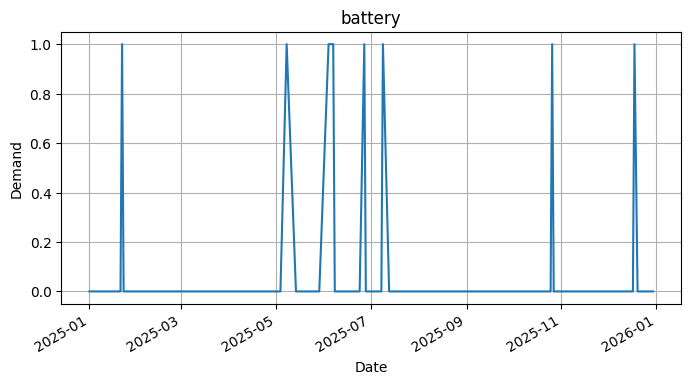

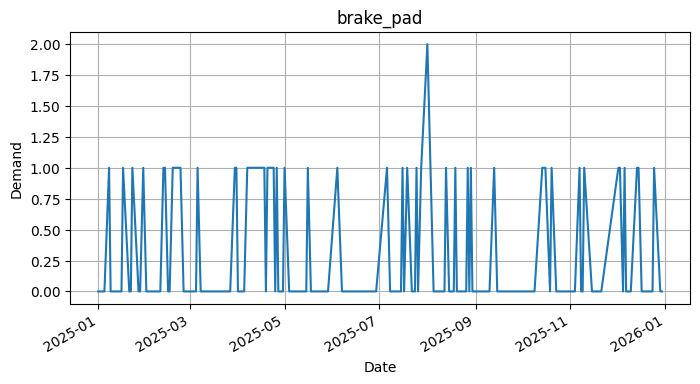

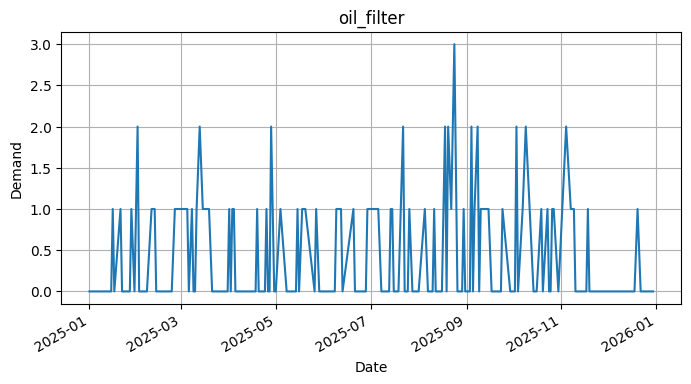

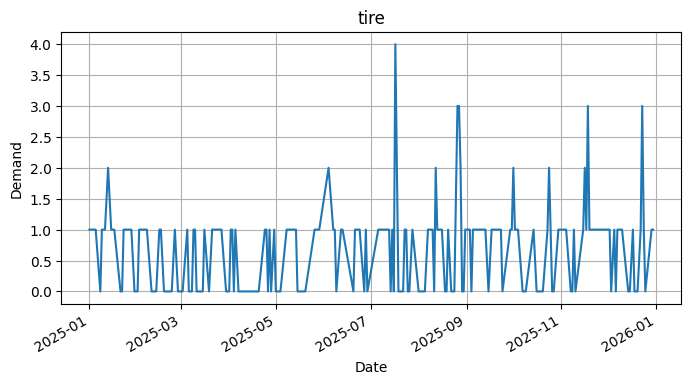

In [194]:
import matplotlib.pyplot as plt

# Data Arrangement
data_arrange = DataArrange(events=events, start_time=cfg.start_time)

# each part data
for col in data_arrange.part_data.columns:
    data_arrange.part_data[col].plot(figsize=(8,4), title=col)
    plt.xlabel("Date")
    plt.ylabel("Demand")
    plt.grid(True)
    plt.show()



